In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("P:\SSM project\Datasets\SSH\ssh_logs_processed.csv")  

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Sivapriya\AppData\Local\Temp\ipykernel_17780\3454241839.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("P:\SSM project\Datasets\SSH\ssh_logs_processed.csv")


In [3]:
df['Username'] = df['Username'].fillna('missing')
df['Password'] = df['Password'].fillna('missing')

In [4]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['weekday'] = df['datetime'].dt.weekday
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

df.drop(['Date', 'Time', 'datetime'], axis=1, inplace=True)


In [5]:
categorical_cols = ['Username', 'Password', 'Country', 'City', 'IP']
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le  

In [6]:
iso_model = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
df['iso_label'] = iso_model.fit_predict(df)

In [7]:
print(f"Total records: {len(df)}")
iso_anomalies = (df['iso_label'] == -1).sum()
print("Isolation Forest anomalies:", iso_anomalies)


Total records: 84379
Isolation Forest anomalies: 1687


In [8]:
df.to_csv(r"P:\SSM project\Models\Models_PKL\SSH\df_ssh.csv", index=False)


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prettify plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

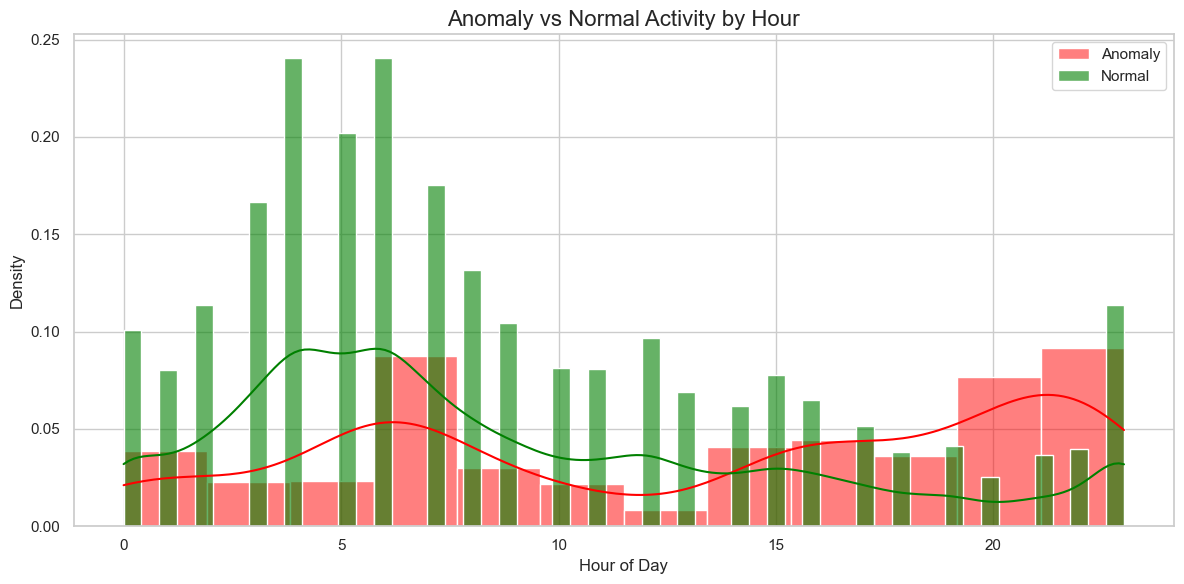

In [10]:
sns.histplot(df[df['iso_label'] == -1]['hour'], color='red', label='Anomaly', kde=True, stat='density')
sns.histplot(df[df['iso_label'] == 1]['hour'], color='green', label='Normal', kde=True, stat='density', alpha=0.6)
plt.title("Anomaly vs Normal Activity by Hour", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


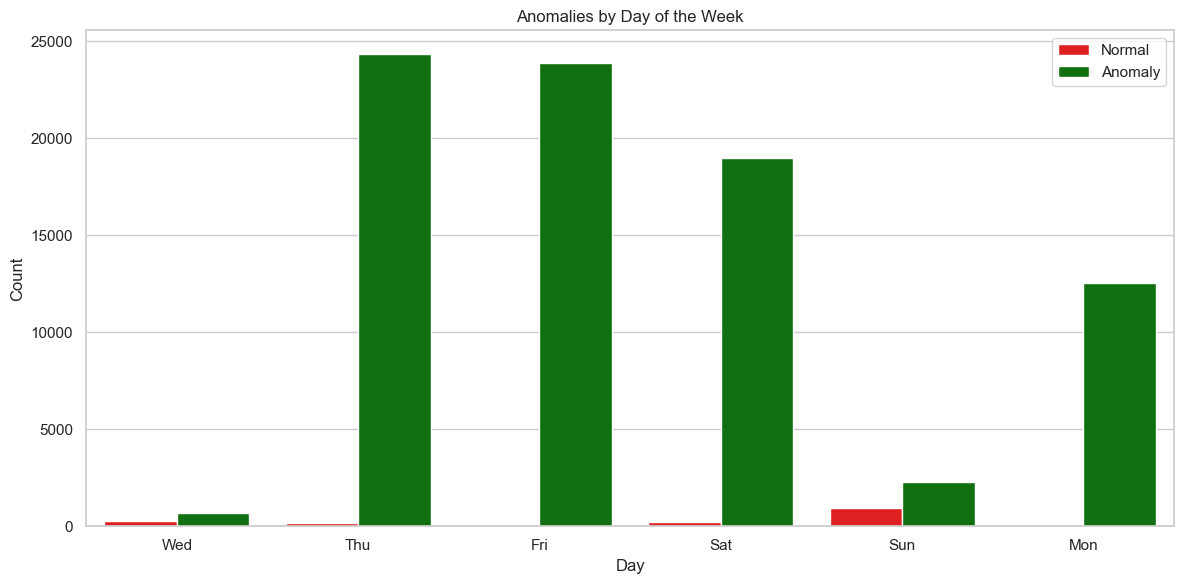

In [11]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['day_name'] = df['weekday'].map(lambda x: days[x])

sns.countplot(data=df, x='day_name', hue='iso_label', palette={1: 'green', -1: 'red'})
plt.title("Anomalies by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.legend(labels=['Normal', 'Anomaly'])
plt.tight_layout()
plt.show()


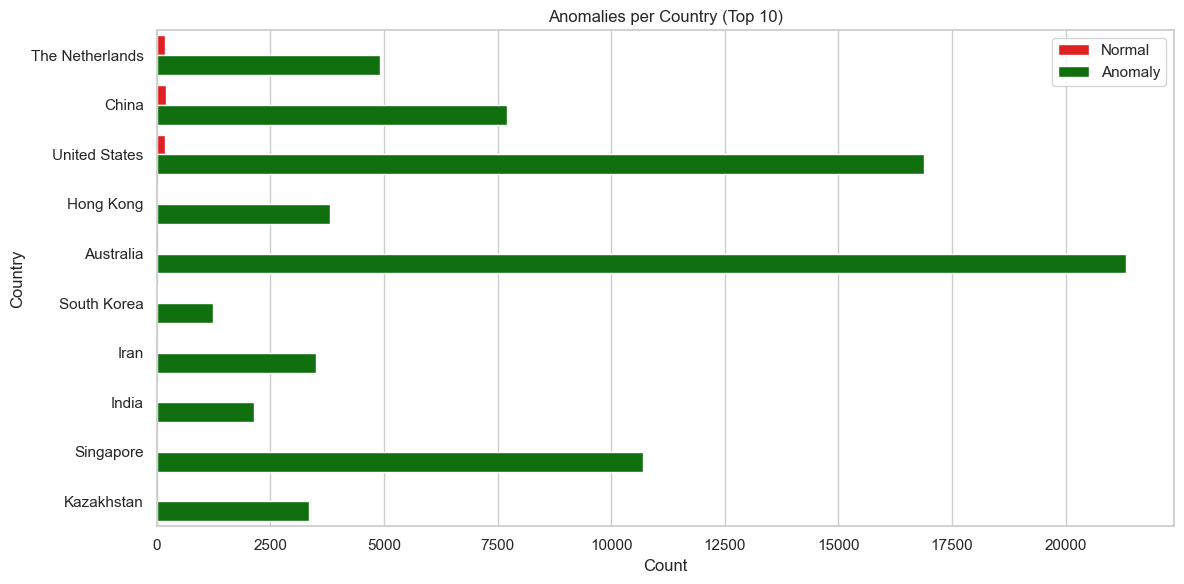

In [12]:
df['CountryName'] = encoders['Country'].inverse_transform(df['Country'])

top_countries = df['CountryName'].value_counts().head(10).index
filtered_df = df[df['CountryName'].isin(top_countries)]

sns.countplot(data=filtered_df, y='CountryName', hue='iso_label', palette={1: 'green', -1: 'red'})
plt.title("Anomalies per Country (Top 10)")
plt.xlabel("Count")
plt.ylabel("Country")
plt.legend(labels=['Normal', 'Anomaly'])
plt.tight_layout()
plt.show()


In [13]:
import joblib

joblib.dump(iso_model, 'SSH.pkl')


['SSH.pkl']